In [1]:
# import libraries
import pandas as pd
import boto3
import numpy as np
from sklearn.model_selection import train_test_split

# Week 3 - Machine Learning Model training

- Setup & Load Processed Data
- Prepare Data for Modeling (prepare the data for ML model)
- Split Data - Train & Test 
- Train Models
- Evaluate Models
- Pick the Best Model
- Save the Model

## Step 1 - Setup & Load processed data

In [2]:
# Setup and Load processed data

# step 1 define parameters
bucket_name = "mo-churn-bucket"

# step 2 - create a session or client
s3 = boto3.client("s3")

# step 3 - load the data
obj = s3.get_object(Bucket=bucket_name, Key="telco_churn_processed.csv")

# step 4- place the data in a dataframe
df = pd.read_csv(obj['Body'])

print(f" loaded {df.shape[0]} rows and {df.shape[1]} columns from s3://{bucket_name}/telco_churn_processed.csv")




 loaded 7043 rows and 28 columns from s3://mo-churn-bucket/telco_churn_processed.csv


In [3]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Churn_numeric,MonthlyCharges_Average,HasPhoneService,IsSeniorCitizen,HasPartner,HasDependents,HasSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,29.85,No,0,64.761692,0,0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.50,No,0,64.761692,1,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,Yes,1,64.761692,1,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,42.30,1840.75,No,0,64.761692,0,0,0,0,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,70.70,151.65,Yes,1,64.761692,1,0,0,0,0


## Step 2 - Prepare the Data for Modelling

In [4]:
# Target variables (what we want to predict)
target = 'Churn_numeric'

# Features we dont need for modelling (an intelligent machine)
columns_to_drop = ['customerID', 'Churn']

# check if the target variable exists in the dataframe
if target not in df.columns:
    print("creating target variable")
    df['Churn_numeric'] = np.where(df['Churn']=='Yes', 1, 0)

print(f"Target variable '{target}' exists in the dataframe")

Target variable 'Churn_numeric' exists in the dataframe


- X(features of someone that can churn) - these are the clues we give the model (intelligent machine)
- y(Target) = the answer we want the model to learn (did it churn yes or no or 1 or 0)

- why we remove churn and churn_numeric? - so we cant give the model the answer the model need to learn patterns from OTHER  feature to predict churn

In [5]:
## Step 3 - Prepare Feature Matrix (X) and Target Vector (y)
# X is the feature matrix (input data) while Y is the target vector (output data)

X = df.drop(columns=columns_to_drop  + [target], errors='ignore')
y = df[target]

print(f"Feature matrix X has shape: {X.shape}")
print(f"Target vector y has shape: {y.shape}")

Feature matrix X has shape: (7043, 25)
Target vector y has shape: (7043,)


In [6]:
## step 3 - FINAL check for missing values 

#check for missing values in X
missing_values = X.isnull().sum().sum()
print("Missing values in each column of X:")

if missing_values > 0:
    X.fillna(0, inplace=True)
    print("Missing values found and filled with 0")

Missing values in each column of X:


In [7]:
# step 4 - split the data into training and testing sets

# Rules for splitting is 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set has {X_train.shape[0]} samples")
print(f"Testing set has {X_test.shape[0]} samples")



Training set has 5634 samples
Testing set has 1409 samples


X - Independent variables --- these are columns or feature that the model depends on to learn

Y - target variable -- Churn  - this is the column we're also giving to the model to learn what result or output we expect

X_train -------    - 80%
Y_train -------


X_test  ----   - 20%
Y_test ----

- Training set - used to teach the model
- testing set - used to check if model work on new, unseen data
- Example ; study material vs final exam

# Train model with 3 different models and compare them 

- model 1 - Logistic Regression
- model 2 - Random Forest
- model 3 - XGBoost


In [8]:
#check whoch colusm are categorical

categorical_cols = X.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")


# convert all categorical columns to numbers - (using one hot encoding)
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category').cat.codes
    X_test[col] = X_test[col].astype('category').cat.codes

#verify the changes
print("After encoding, sample data:")
print(X_train.head())

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


After encoding, sample data:
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
2142       0              0        0           1      21             1   
1623       0              0        0           0      54             1   
6074       1              0        1           0       1             0   
1362       1              0        0           0       4             1   
6754       1              0        0           1       0             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
2142              0                0               2             0  ...   
1623              2                1               0             2  ...   
6074              1                0               0             0  ...   
1362              0                1               0             0  ...   
6754              2                0               2             2  ...   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  \
2142

## Logistic Regession 

what is this logistic regression : simple and fast model(ML algorithm) 
- its very good for binary classfication (YES/NO or 1/0)
- easy interpret 
- This of it as a police trying to solve a ciminal case - gathers all the documents, learns from it , its makes up a conclusion --- Logistic regression works its goes into the data understand all the patterns and then decides who should we consider as those that churn or not

In [9]:
print("Training Model 1: Logistic Regression")

# step 1 - import the model
from sklearn.linear_model import LogisticRegression

# step 3 - create the model 
lr_model = LogisticRegression(max_iter=5000, random_state=42)

# step 4 - fit the model
print("Training the Logistic Regression model...")
lr_model.fit(X_train, y_train)

# step 5 - make predictions
y_pred_lr = lr_model.predict(X_test)

# step 6 - print out the length og he predictions
print(f"Logistic Regression made {len(y_pred_lr)} predictions")

Training Model 1: Logistic Regression
Training the Logistic Regression model...
Logistic Regression made 1409 predictions


In [10]:
y_pred_lr[:10]  # print first 10 predictions

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

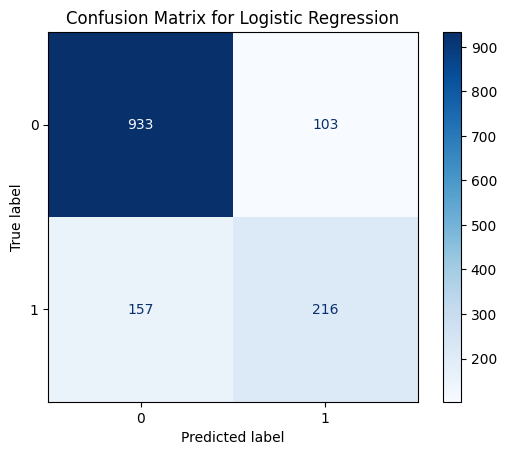

In [11]:
# visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")   
plt.show()


In [12]:
# confusion matric understanding 

# True Positives (TP): you predicted that a customer will leave, and they did.
# example you noticed a customer is complaining ---- you predicted that they wont return -- they never came back


# True Negatives (TN): Ypu predicted that a customer will stay , and they did
# example - you noticed a customer is happy with your service --- you predicted they'd return -- they came back


# False Positives (FP): you predicted this customer will leave, but they eventually stayed
# example - customerr forgot to tip or they had an angry face througout -- you thought they'd never return -- they came back

# False Negative , you predicted this customer will stay, but they eventually left
# examples - customer was happy and smiling -- you thought they'd return -- they never came back (maybe the customer was pretending)

## Random Forest

- What is random forest - an ensemble model 

In ML there is what we call Decision Trees - Its  kind of algorithm that helps make decision in a very sequential way 

Random Forest -- we're using many decision trees (like a forest)
more powerful than a single tree
Good at handling complex patterns

In [13]:
# implement Random Forest model
print("Training Model : Random Forest")

# step 1 - import the model
from sklearn.ensemble import RandomForestClassifier

# step 2 - create the model
# random forest is a collection of decision trees, our n_estimators is the number of trees in the forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# step 3 train the model
print("Training the Random Forest model...")
rf_model.fit(X_train,y_train)

# step 4 - make predictions
y_pred_rf = rf_model.predict(X_test)

print(f"Random Forest made {len(y_pred_rf)} predictions")

Training Model : Random Forest
Training the Random Forest model...
Random Forest made 1409 predictions


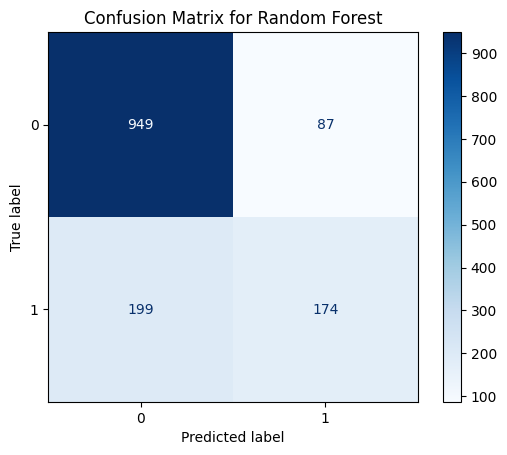

In [14]:
# vs=ualize the results
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show()

# XGBOOST

- Xgboost is an advanced version of decision tree
- often gives best results

In [15]:
print("Training Model : XGBoost")

# step 1 - import the XGBClassifier
from xgboost import XGBClassifier

# step 2 - create the model
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

# step 3 - train the model
print("Training the XGBoost model...")
xgb_model.fit(X_train, y_train)

# step 4 - make predictions
y_pred_xgb = xgb_model.predict(X_test)
print(f"XGBoost made {len(y_pred_xgb)} predictions")

Training Model : XGBoost
Training the XGBoost model...
XGBoost made 1409 predictions


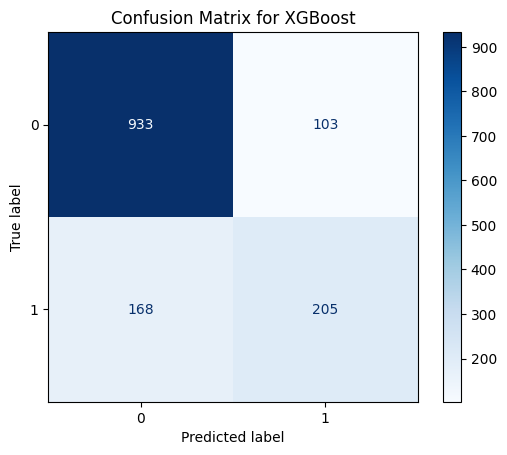

In [16]:
#visualize the results
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay    

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XGBoost")
plt.show()

- take a look at the 3 model and 
- interpre the results, 
- understand the best model and why

# Evaluation of Models

Before we evaluate . Lets understand what we're Measuring


1 - Accurary
   How many prediction were correct overall?
   formula : (Correct Prediction) / (Total prediction)
   example : 80% acccuracy = 80 of out 100 prediction were correct

2 - Precision
  of all the customers we predicted would churn, how many actually did?
  formula (True churners predicted) / (All Predicted Churners)
  example : 75% precision = 75 out of 100 predicted churners actually churned


3 - Recall
 of all customers who actually churned, how many did we catch? or how many did the model catch
 formula : (True churners predicted) / (All actual churners)
 example : 70& recal = we caught 70 out of 100 actual churner
        1000 people that churned --- the machine got correct only 70% from the 1000 people

4 - F1-SCORE
 - Balance between preciion and Recall
 Formula : 2 * (Precision * Recall) / (Precision + Recall)

1 - we know they churned             2 - the model predicted they churned 
                                        - did the model predict correctly or not
from our original data 
(Churn columns)

In [22]:
#calculate metrics for all models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# step 1 - create a function to calculate metrics
def evaluate_model(y_true, y_pred, model_name):

    # step 1b - accuracy and we feed it the true values and predicted values
    accuracy = accuracy_score(y_true, y_pred)

    # step 1c - precision and we feed it the true values and predicted values
    precision = precision_score(y_true, y_pred)

    # step 1d - recall and we feed it the true values and predicted values
    recall = recall_score(y_true, y_pred)

    # step 1e - f1 score and we feed it the true values and predicted values
    f1 = f1_score(y_true, y_pred)
    
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 30)

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }


# step 2 - evaluate all models
results = []
results.append(evaluate_model(y_test, y_pred_lr, "Logistic Regression"))
results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))
results.append(evaluate_model(y_test, y_pred_xgb, "XGBoost"))

# step 3 - create a dataframe to compare the results
results_df = pd.DataFrame(results, index=["Logistic Regression", "Random Forest", "XGBoost"])
print("Comparison of Model Performance:")
print(results_df)

Metrics for Logistic Regression:
Accuracy: 0.8155
Precision: 0.6771
Recall: 0.5791
F1 Score: 0.6243
------------------------------
Metrics for Random Forest:
Accuracy: 0.7970
Precision: 0.6667
Recall: 0.4665
F1 Score: 0.5489
------------------------------
Metrics for XGBoost:
Accuracy: 0.8077
Precision: 0.6656
Recall: 0.5496
F1 Score: 0.6021
------------------------------
Comparison of Model Performance:
                     accuracy  precision    recall  f1_score
Logistic Regression  0.815472   0.677116  0.579088  0.624277
Random Forest        0.797019   0.666667  0.466488  0.548896
XGBoost              0.807665   0.665584  0.549598  0.602056


## Visualize Model Comparison

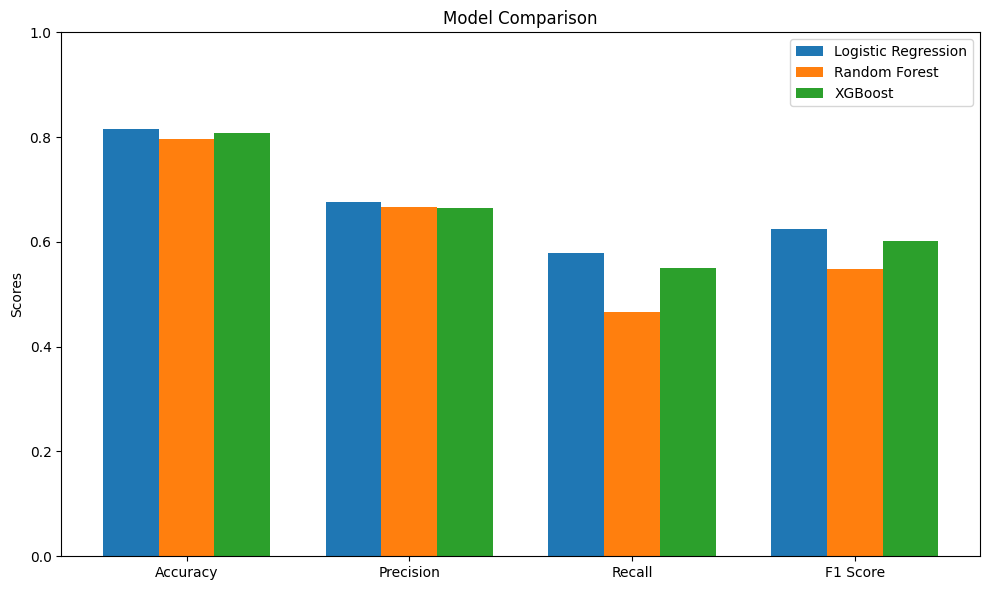

In [23]:
# Create comparison chart

# step 1 define the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# step 2 metrics to compare
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# step 3 - plot bars for each model
x = np.arange(len(metrics))  # the label locations
width = 0.25  # the width of the bars

# plot bars for each model
ax.bar(x - width, results_df.loc['Logistic Regression'], width, label='Logistic Regression')
ax.bar(x, results_df.loc['Random Forest'], width, label='Random Forest')
ax.bar(x + width, results_df.loc['XGBoost'], width, label='XGBoost')



# step 4 - add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# step 5 - show the plot
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [24]:
# save the best model locally
import joblib
joblib.dump(lr_model, 'logistic_regression_model.joblib')
print("Logistic Regression model saved as 'logistic_regression_model.joblib'")



Logistic Regression model saved as 'logistic_regression_model.joblib'


In [25]:
# test loading the model
loaded_model = joblib.load('logistic_regression_model.joblib')

In [26]:
# predict using the loaded model
loaded_model.predict(X_test[:10])

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [27]:
# Use to S3 to store the model

# step 1 - define the S3 bucket and model file name
bucket_name = "mo-churn-bucket"
model_file_name = "logistic_regression_model.joblib"

# step 2 - upload the model to S3
s3.upload_file(model_file_name, bucket_name, model_file_name)
print(f"Model uploaded to s3://{bucket_name}/{model_file_name}")

Model uploaded to s3://mo-churn-bucket/logistic_regression_model.joblib


# TASK

- Visualize the individual predictions
- Feature Importance (What matter most?)